In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import cv2 as cv
import subprocess

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cam = cv.VideoCapture(0)

In [3]:
def get_image():
    ret, frame = cam.read()
    rgb_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    small_image = cv.resize(rgb_frame[0:720, 280:1000], dsize=(299,299))
    plt.imshow(small_image)
    small_image_f32 = np.float32(small_image)
    small_image_f32_r3 = np.expand_dims(small_image_f32, 0)
    scaled_image = small_image_f32_r3/255
    return scaled_image

In [4]:
def predict_image(im):
    prediction = iv3.predict(im)
    return keras.applications.inception_v3.decode_predictions(prediction)

In [5]:
iv3 = keras.applications.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

In [6]:
def capture_and_predict():
    im = get_image()
    prediction = predict_image(im)
    name = prediction[0][1][1]
    return name

In [10]:
sth, im = cam.read()

In [16]:
fim = np.float32(im)

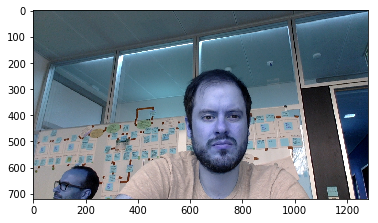

In [17]:
plt.imshow(im)

'medicine_chest'

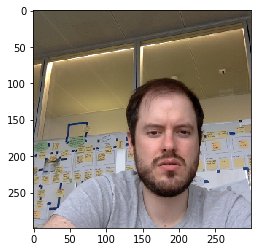

In [18]:
capture_and_predict()

In [19]:
import requests
from urllib.parse import urlencode

In [20]:
wiki_url_pattern = "https://en.wikipedia.org/w/api.php?action=opensearch&format=json&redirects=resolve&origin=*&search={}"

def get_entity(name):
    query_url = wiki_url_pattern.format(name)
    r = requests.get(query_url)
    if r.status_code != 200:
        return
    r_js = r.json()
#     print(r_js[1][0])
    return  r_js[1][0], r_js[2][0], r_js[3][0]

In [21]:
association_url = "https://projects.dfki.uni-kl.de/graph-pattern-learner/api/predict"
dbpedia_pattern = "http://dbpedia.org/resource/{}"

def get_prediction(entity_name):
    no_spaces_name = "_".join(entity_name.split())
    dbpedia_url = dbpedia_pattern.format(no_spaces_name)
    payload = {'source': dbpedia_url}
    r = requests.post(association_url, data=payload)
    if r.status_code != 200:
        return r
    
    r_js = r.json()
    return r_js

In [22]:
def get_association(query):
    entity_name, entity_description, wiki_url = get_entity(query)
    r = get_prediction(entity_name)
    prediction_uri = r['fused_results']['precisions'][0][0]
    prediction_name = prediction_uri.split('/')[-1]
    return entity_name, prediction_name

In [23]:
def say(sentence):
    subprocess.run(['say', sentence])

In [24]:
say_pattern = "When I see {}, I think of {}"

def type_say(query):
    db_query, response = get_association(query)
    say_sentence = say_pattern.format(db_query, response)
    print(say_sentence)
    say(say_sentence)

In [25]:
def see_say():
    saw = capture_and_predict()
    type_say(saw)

When I see Cup, I think of Glass


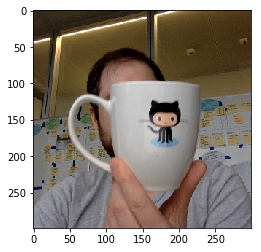

In [37]:
see_say()